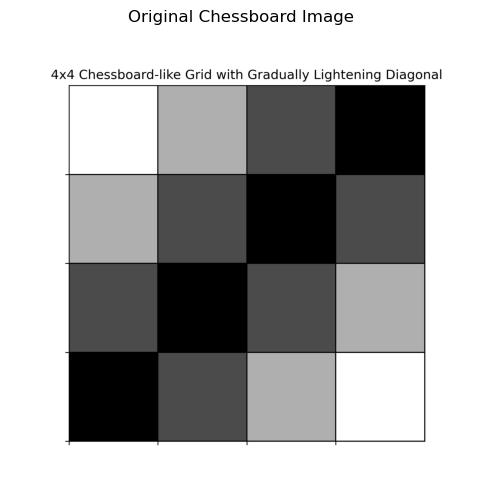

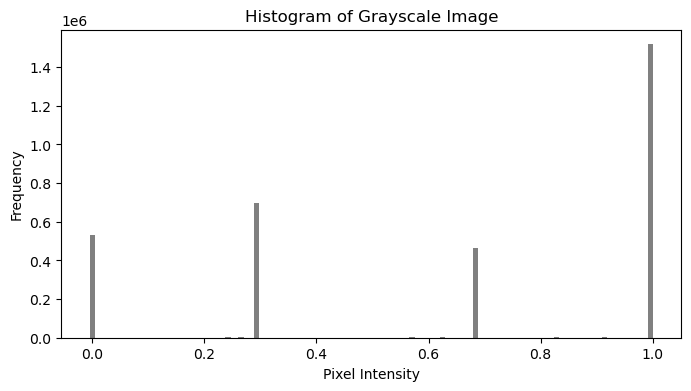

<Figure size 640x480 with 0 Axes>

In [11]:
"""
# Theoretical Aspect of Histogram

A histogram is a graphical representation of the distribution of numerical data. 
It represents the frequency of data points within specified ranges, known as bins.
Each bin corresponds to a range of values, and the height of the bar in the histogram 
indicates how many data points fall into that range.

In the context of image processing, a histogram is used to represent the distribution of 
pixel intensities (grayscale or color) within an image. Each bin corresponds to a pixel 
intensity value, and the height of the bar indicates the number of pixels with that intensity.

# Significance of Histogram

1. **Understanding Image Characteristics**:
   - Histograms help us analyze the brightness and contrast of an image.
   - They provide a quantitative way to describe the overall lightness or darkness of an image.

2. **Enhancing Image Quality**:
   - By analyzing a histogram, we can decide if an image needs brightness or contrast adjustment.
   - Histogram Equalization is a technique that uses the histogram to improve the contrast of an image.

3. **Image Segmentation**:
   - Histograms assist in separating objects of interest from the background, especially in binary segmentation.

4. **Thresholding**:
   - Used in converting grayscale images to binary images by selecting a threshold value based on the histogram.

5. **Feature Extraction**:
   - Histograms serve as a feature descriptor in image classification and recognition tasks.

6. **Image Compression**:
   - By analyzing the distribution of pixel intensities, histograms can help optimize encoding for compression algorithms.

# Applications of Histograms in Image Processing

1. **Histogram Equalization**:
   - Improve contrast in medical imaging, satellite imagery, and night vision.

2. **Object Detection**:
   - Analyze specific intensity ranges to identify regions of interest in industrial applications like defect detection.

3. **Medical Imaging**:
   - Enhance and analyze X-rays, CT scans, and MRI images for better diagnosis.

4. **Computer Vision**:
   - Feature extraction for object recognition, scene analysis, and facial recognition.

5. **Robotics and Automation**:
   - Analyze camera feed histograms for visual navigation and environment mapping.

6. **Quality Control in Manufacturing**:
   - Detect inconsistencies in textures, patterns, or color distributions using histogram analysis.

7. **Video Game Development**:
   - Adjust brightness and contrast dynamically to enhance the visual experience in gaming environments.

# Summary:
Histograms are an essential tool in understanding and manipulating image properties. They provide insights into pixel intensity distributions, enabling applications ranging from simple contrast adjustments to complex object detection and image classification tasks.
"""

import matplotlib.pyplot as plt
import numpy as np

def gradient_chessboard_4x4():
    # Size of the 4x4 grid
    rows, cols = 4, 4
    fig, ax = plt.subplots(figsize=(6, 6))

    # Loop through each square in the 4x4 grid
    for i in range(rows):
        for j in range(cols):
            # Define intensity based on diagonal distance
            intensity = 255  # Default: white
            if i == j:
                intensity = 0  # Main diagonal: black
            elif abs(i - j) == 1:
                intensity = 75  # Next diagonal: lighter black
            elif abs(i - j) == 2:
                intensity = 175  # Further diagonal: even lighter

            # Convert intensity to RGB color
            color = (intensity / 255, intensity / 255, intensity / 255)

            # Plot each square
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black'))

    # Formatting the grid
    ax.set_xticks(np.arange(0, cols, 1))
    ax.set_yticks(np.arange(0, rows, 1))
    ax.set_xticklabels([])  # Remove x-axis ticks
    ax.set_yticklabels([])  # Remove y-axis ticks
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    plt.gca().set_aspect('equal', adjustable='box')  # Maintain aspect ratio
    plt.title("4x4 Chessboard-like Grid with Gradually Lightening Diagonal")

    # Save the plot as a PNG file
    plt.savefig('gradient_chessboard_4x4_matplotlib.png', dpi=300)
    plt.close()  # Close the figure to free memory

# Call the function to generate and save the grid as an image
gradient_chessboard_4x4()

# Load the saved image using plt.imread()
image = plt.imread('gradient_chessboard_4x4_matplotlib.png')

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Original Chessboard Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Convert the image to grayscale (for simplicity in histogram calculation)
gray_image = np.dot(image[:, :, :3], [0.2989, 0.5870, 0.1140])  # RGB to grayscale conversion

# Calculate the histogram for the grayscale image
histogram, bins = np.histogram(gray_image.flatten(), bins=256, range=(0, 1))

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.bar(bins[:-1], histogram, width=0.01, color='gray')  # Bar width adjusted for 256 bins
plt.show()

# Save histogram plot
plt.savefig('histogram_grayscale_image.png', dpi=300)